# Recognizing Digits with k-NN

The MNIST dataset is one of the most widely used datasets in ML classes and has been for years. It consists of 60,000 digitized scans of handwritten digits along with their classifications: 0-9. Sci-kit learn includes a clean subset of this data in its `datasets` package. In this notebook you will recognize digits using a k-NN classifier.

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

The method to return the dataset is `load_digits()`. Call it in the next cell 

In [4]:
# call load_digits() and set the return value to a new variable `digits`
digits = load_digits()

Look at the data stored in `digits` and load the appropriate values into the variables `X` and `y`. $X$ should be an array of vectors, representing the flattened 8x8 image data and $y$ should be an array of labels 0-9.

In [5]:
### Store X and y here
X = digits.data
y = digits.target

The following cells let you explore the dataset.

In [6]:
images = digits.images

data = [ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
  5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
  9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
  0.  0.  0.  0.  0.  0. 13.  6.  0.  0.]
label = 4


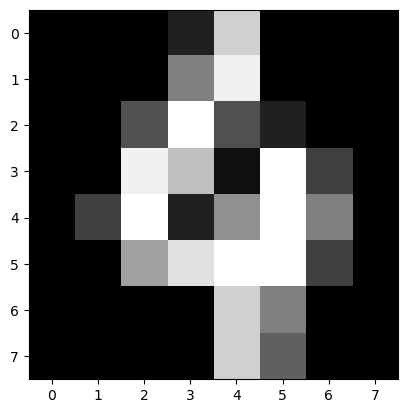

In [7]:
k = 100 # change this
plt.imshow(images[k], cmap='grey')
print(f"data = {X[k]}")
print(f"label = {y[k]}")

Determine the size and shape of your data. How many X and y observations are there? What are their datatypes? Is there any missing data?

In [51]:
## your code here

Is the dataset balanced? Determine the frequency of each label

In [52]:
## your code here

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

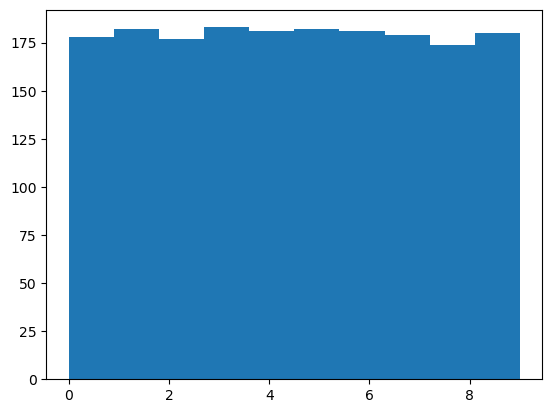

In [8]:
plt.hist(digits.target)

## Training k-NN

We will load the dataset below and some useful library functions. It is your job to make a train/test split and determine the accuracy of a k-NN classifier using scikit learn built in operations. You should

1. Correctly process the data and train a k-NN for k=1.
2. Print the accuracy on the test set
3. Plot a confusion matrix for the test set
4. Analyze the accuracy as k increases. For each k (over a range you determine useful), train a k-NN on 10 train/test splits and store the average accuracy. Plot this accuracy against k.
5. Which $k$ do you think is best?
6. Is "accuracy" a valid metric in this case? Does it obscure any critical shortcoming of our algorithm?

Refer to old notebooks for the functions you need. The basic outline for this is mostly the same for all scikit-learn algorithms.

In [9]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [10]:
# 1. Load the Digits dataset
digits = load_digits()
X, y = digits.data, digits.target

In [19]:
# 2. Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

# 3. Initialize the kNN classifier 
k = 10
knn = KNeighborsClassifier(n_neighbors=k)

# 4. Train the model
knn.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = knn.predict(X_test)

# 6. Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9700


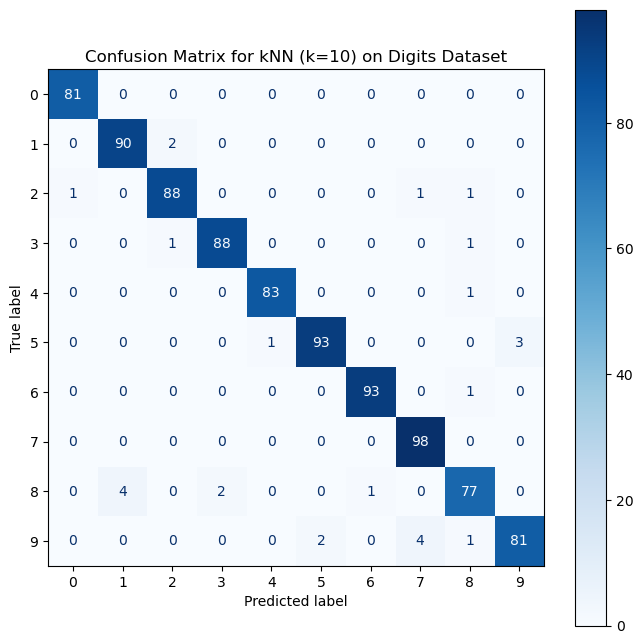

In [20]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap="Blues", ax=ax)
plt.title(f"Confusion Matrix for kNN (k={k}) on Digits Dataset")
plt.show()